In [104]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd

df = pd.read_csv("close_prices.csv", index_col='date')
dj_df = pd.read_csv("djia_index.csv", index_col='date')

Populating the interactive namespace from numpy and matplotlib


На загруженных данных обучите преобразование PCA с числом компоненты равным 10. Скольких компонент хватит, чтобы объяснить 90% дисперсии?

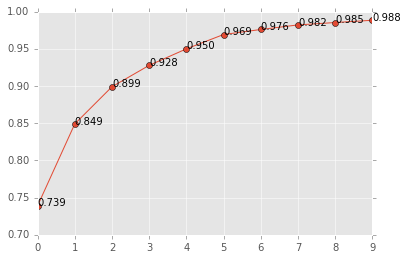

In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(df)
var = pca.explained_variance_ratio_
var_cum = [var[:i].sum() for i in xrange(1, len(var) + 1)]
plt.plot(var_cum, '-o')
for i in xrange(len(var)):
    plt.annotate("{0:.3f}".format(var_cum[i]), (i, var_cum[i]))
plt.show()

In [93]:
with open("submissions/4_2.txt", "w") as f:
    f.write("4")

Примените построенное преобразование к исходным данным и возьмите значения первой компоненты. Загрузите информацию об индексе Доу-Джонса из файла djia_index.csv. Чему равна корреляция Пирсона между первой компонентой и индексом Доу-Джонса?

In [112]:
x = pca.transform(df)
np.corrcoef(x[:, 0], dj_df['^DJI'])

array([[ 1.        ,  0.90965222],
       [ 0.90965222,  1.        ]])

In [113]:
with open("submissions/4_3.txt", "w") as f:
    f.write("0.91")

Какая компания имеет наибольший вес в первой компоненте? Укажите ее название с большой буквы.

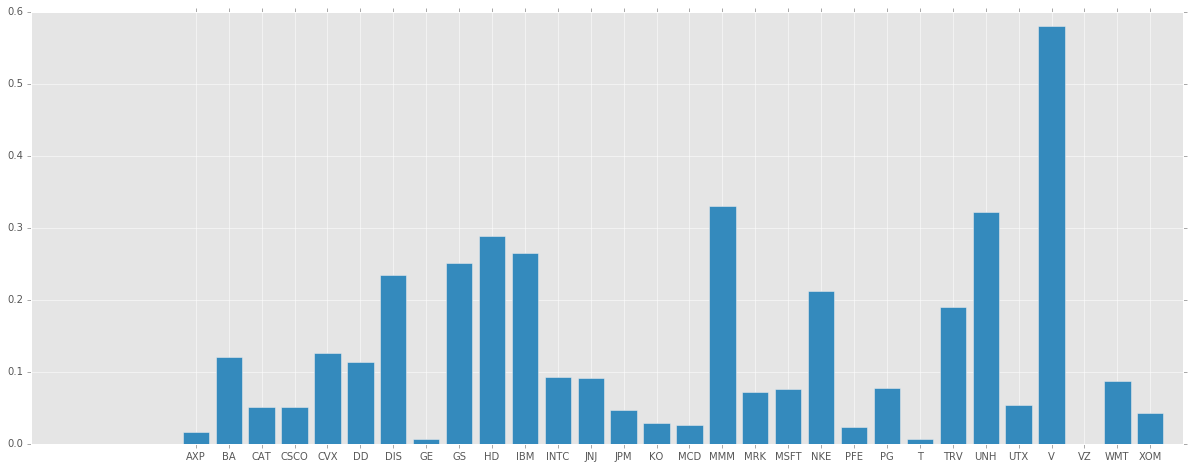

In [131]:
abs_components = [abs(c) for c in pca.components_[0]]
n = len(abs_components)

f = pylab.figure(figsize=(16,6))
ax = f.add_axes([0, 0, 1, 1])
ax.bar(range(n), abs_components, align='center')
ax.set_xticks(range(n))
ax.set_xticklabels(df.columns)
f.show()

In [97]:
with open("submissions/4_4.txt", "w") as f:
    f.write("V")